In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
%matplotlib notebook

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import pylab

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    pylab.show()
    #fig.canvas.draw()

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**3 CONVOLUTION LAYER**

In [4]:
model = Sequential()
model.add(Conv2D(100, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 100)       2600      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        57664     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0622 15:53:00.388287 140437071800192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0622 15:53:00.401283 140437071800192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0622 15:53:27.780707 140437071800192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 334s 6ms/step - loss: 0.1996 - acc: 0.9381 - val_loss: 0.0509 - val_acc: 0.9828
Epoch 2/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0589 - acc: 0.9820 - val_loss: 0.0337 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0440 - acc: 0.9867 - val_loss: 0.0328 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0347 - acc: 0.9893 - val_loss: 0.0396 - val_acc: 0.9857
Epoch 5/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 6/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0243 - acc: 0.9923 - val_loss: 0.0251 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0218 - acc: 0.9928 - val_loss: 0.0257 - 

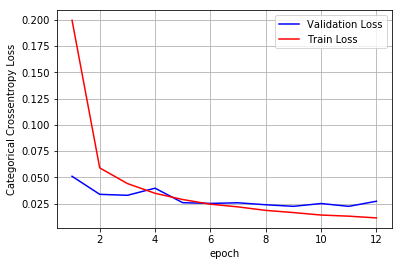

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**5 CONVOLUTION LAYER**

In [16]:
model1 = Sequential()
model1.add(Conv2D(100, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(64, (4, 4), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(42, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Conv2D(30, (2, 2), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

W0622 17:21:45.065067 140437071800192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 100)       2600      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 42)          24234     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 42)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 42)          168       
__________

In [0]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [19]:
history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 501s 8ms/step - loss: 0.1747 - acc: 0.9460 - val_loss: 0.0539 - val_acc: 0.9840
Epoch 2/12
60000/60000 [==============================] - 501s 8ms/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.0393 - val_acc: 0.9865
Epoch 3/12
60000/60000 [==============================] - 501s 8ms/step - loss: 0.0407 - acc: 0.9875 - val_loss: 0.0269 - val_acc: 0.9916
Epoch 4/12
60000/60000 [==============================] - 502s 8ms/step - loss: 0.0340 - acc: 0.9892 - val_loss: 0.0242 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 501s 8ms/step - loss: 0.0285 - acc: 0.9913 - val_loss: 0.0221 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 500s 8ms/step - loss: 0.0250 - acc: 0.9923 - val_loss: 0.0265 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 502s 8ms/step - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0213 - 

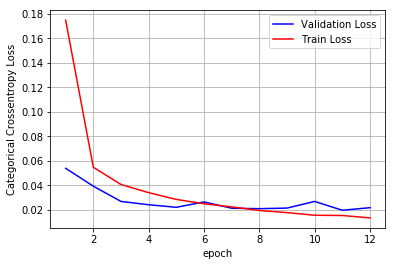

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)

**7 LAYER CNN**

In [35]:
model2 = Sequential()
model2.add(Conv2D(100, kernel_size=(8, 8),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(90, (7, 7), activation='relu'))
#model2.add(MaxPooling2D(pool_size=(5, 5)))
model2.add(Dropout(0.25))
model2.add(Conv2D(80, (6, 6), activation='relu'))
#model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(30, (4, 4), activation='relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(25, (3, 3), activation='relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Conv2D(20, (2, 2), activation='relu'))
model2.add(Dropout(0.15))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 21, 21, 100)       6500      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 15, 15, 90)        441090    
_________________________________________________________________
dropout_28 (Dropout)         (None, 15, 15, 90)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 10, 10, 80)        259280    
_________________________________________________________________
batch_normalization_15 (Batc (None, 10, 10, 80)        320       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 30)          38430     
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 5, 5, 25)          6775      
__________

In [0]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [37]:
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1308s 22ms/step - loss: 0.3361 - acc: 0.8950 - val_loss: 0.1625 - val_acc: 0.9509
Epoch 2/12
60000/60000 [==============================] - 1311s 22ms/step - loss: 0.0929 - acc: 0.9732 - val_loss: 0.0592 - val_acc: 0.9828
Epoch 3/12
60000/60000 [==============================] - 1310s 22ms/step - loss: 0.0641 - acc: 0.9817 - val_loss: 0.0533 - val_acc: 0.9845
Epoch 4/12
60000/60000 [==============================] - 1310s 22ms/step - loss: 0.0506 - acc: 0.9850 - val_loss: 0.0480 - val_acc: 0.9861
Epoch 5/12
60000/60000 [==============================] - 1311s 22ms/step - loss: 0.0416 - acc: 0.9884 - val_loss: 0.0384 - val_acc: 0.9881
Epoch 6/12
60000/60000 [==============================] - 1314s 22ms/step - loss: 0.0371 - acc: 0.9893 - val_loss: 0.0512 - val_acc: 0.9840
Epoch 7/12
60000/60000 [==============================] - 1317s 22ms/step - loss: 0.0341 - acc: 0.9903 - val_l

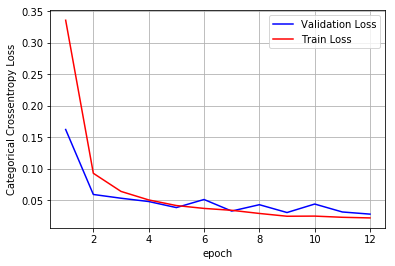

In [38]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)

**SUMMARY**

In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["NO OF HIDDEN LAYERS", "TEST ACCURACY"]

x.add_row([3,0.9919])
x.add_row([5,0.9938])

x.add_row([7,0.992])

print(x)

+---------------------+---------------+
| NO OF HIDDEN LAYERS | TEST ACCURACY |
+---------------------+---------------+
|          3          |     0.9919    |
|          5          |     0.9938    |
|          7          |     0.992     |
+---------------------+---------------+
